In [1]:
import numpy as np
import pandas as pd
import os

### CIFAR10 dataset create

In [2]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = \
    cifar10.load_data()

print('train dataset shape: ', train_images.shape, train_labels.shape)
print('test dataset shape: ', test_images.shape, test_labels.shape)

Init Plugin
Init Graph Optimizer
Init Kernel
170500096/170498071 [==============================] - 26s 0us/step
train dataset shape:  (50000, 32, 32, 3) (50000, 1)
test dataset shape:  (10000, 32, 32, 3) (10000, 32, 32, 3)


In [3]:
train_images[0, :, :, :]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
train_labels[0, :]

array([6], dtype=uint8)

In [5]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


### CIFAR dataset visualization

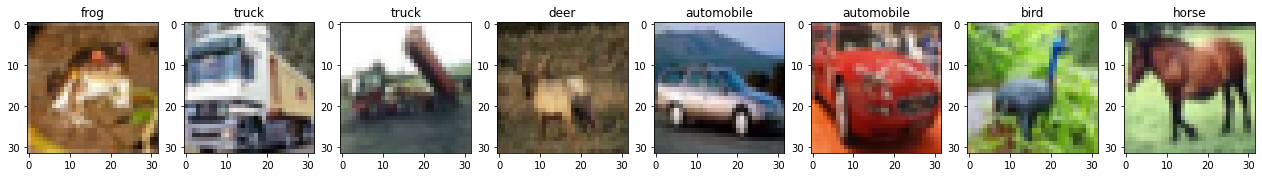

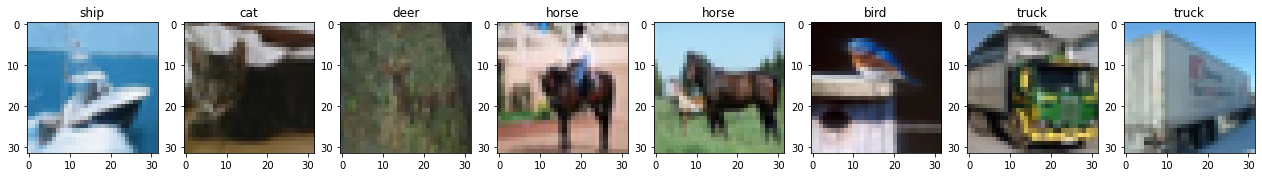

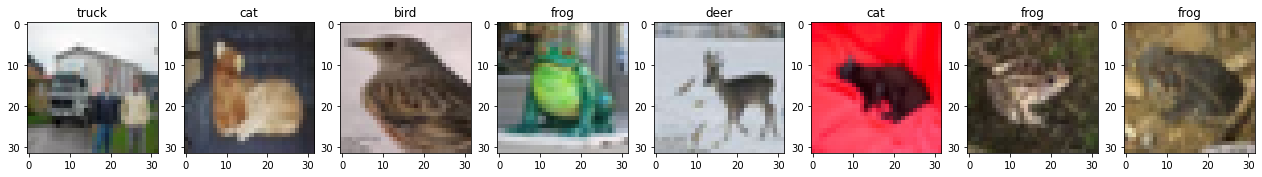

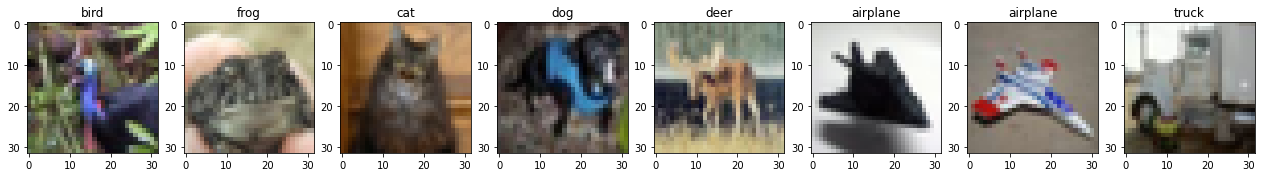

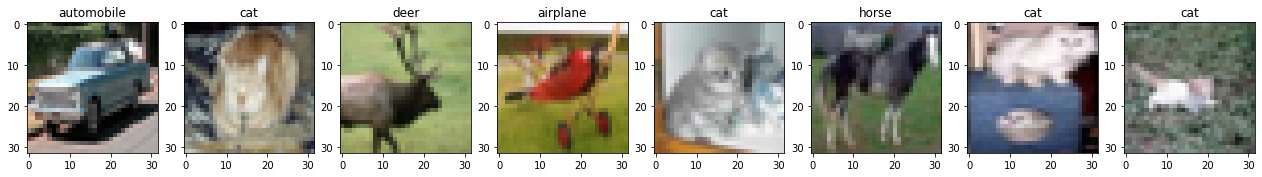

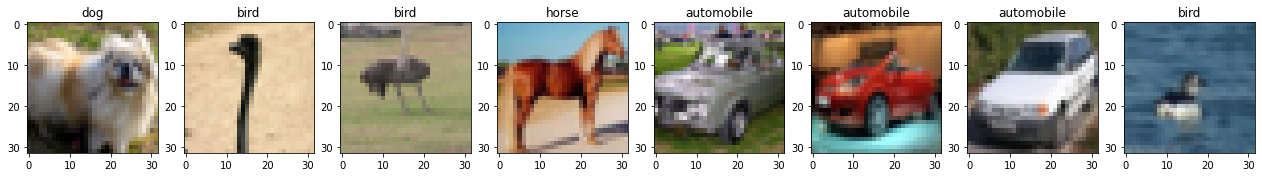

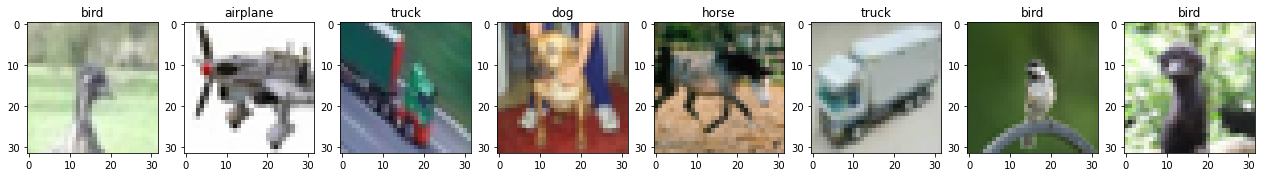

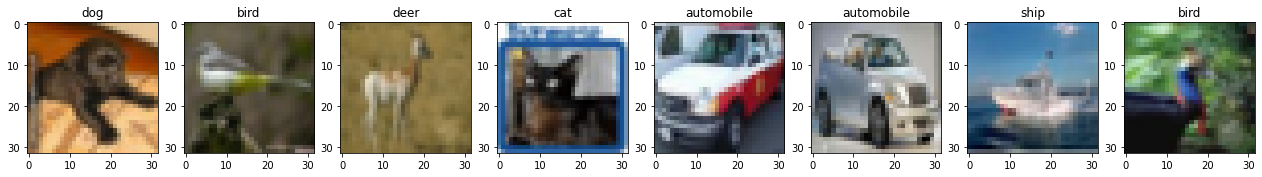

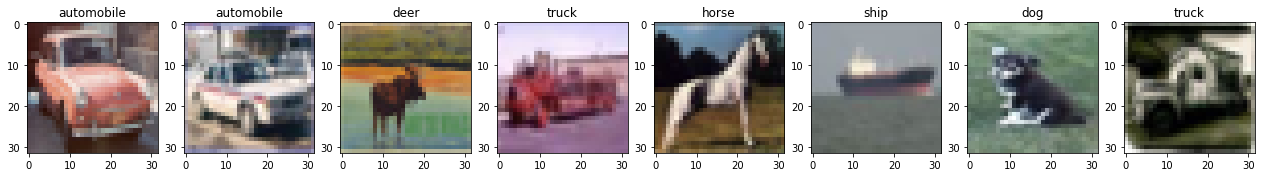

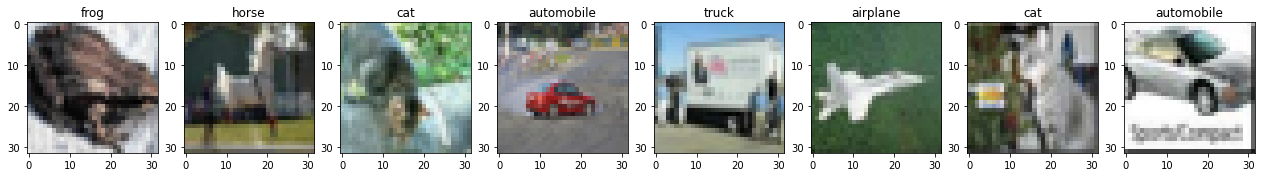

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()
        axs[i].set_title(NAMES[int(label)])

for i in range(0, 80, 8):
    show_images(train_images[i:i+8], train_labels[i:i+8], ncols=8)

### CIFAR10 dataset preprocessing

In [10]:
def get_preprocessed_data(images, labels):
    
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [11]:
train_images[0, :, :, :]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [12]:
train_labels[0, :]

array([6.], dtype=float32)

In [13]:
print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [14]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

print(train_labels.shape)
print(test_labels.shape)

(50000,)
(10000,)


### Custom Model Create

In [15]:
IMAGE_SIZE = 32

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.5)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Metal device set to: Apple M1
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (N

2021-08-16 12:53:38.290115: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-16 12:53:38.291250: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Model Compile

In [20]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15)

2021-08-16 12:57:02.271891: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-16 12:57:02.276562: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30


2021-08-16 12:57:02.523380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


665/665 [==============================] - ETA: 0s - loss: 1.7707 - accuracy: 0.3319

2021-08-16 12:57:19.517567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


665/665 [==============================] - 18s 25ms/step - loss: 1.7707 - accuracy: 0.3319 - val_loss: 1.3356 - val_accuracy: 0.5157
Epoch 2/30
665/665 [==============================] - 16s 24ms/step - loss: 1.2726 - accuracy: 0.5396 - val_loss: 1.0892 - val_accuracy: 0.6113
Epoch 3/30
665/665 [==============================] - 16s 24ms/step - loss: 1.0542 - accuracy: 0.6253 - val_loss: 0.9091 - val_accuracy: 0.6771
Epoch 4/30
665/665 [==============================] - 16s 24ms/step - loss: 0.9093 - accuracy: 0.6796 - val_loss: 0.9247 - val_accuracy: 0.6763
Epoch 5/30
665/665 [==============================] - 16s 24ms/step - loss: 0.8239 - accuracy: 0.7109 - val_loss: 0.7681 - val_accuracy: 0.7304
Epoch 6/30
665/665 [==============================] - 16s 24ms/step - loss: 0.7406 - accuracy: 0.7398 - val_loss: 0.7100 - val_accuracy: 0.7544
Epoch 7/30
665/665 [==============================] - 16s 24ms/step - loss: 0.6858 - accuracy: 0.7595 - val_loss: 0.6639 - val_accuracy: 0.7663
Epo

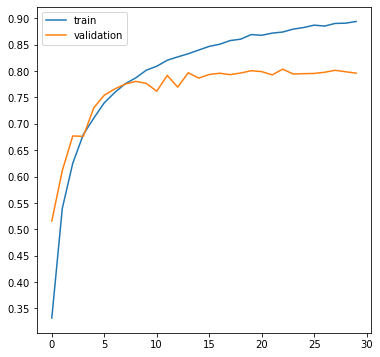

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.legend()

show_history(history)

### Model Evaluate

In [25]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.7276 - accuracy: 0.7938


[0.7276041507720947, 0.7938000559806824]

### Model Predict

In [28]:
preds = model.predict(np.expand_dims(test_images[0], axis=0))
print('prediction shape: ', preds.shape)
print('prediction: ', preds)

2021-08-16 18:28:00.803989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


prediction shape:  (1, 10)
prediction:  [[4.0007611e-03 2.0895975e-02 2.9843501e-03 6.6062385e-01 7.7838631e-05
  6.5163016e-02 2.1630740e-02 8.3668286e-04 1.7221420e-01 5.1572550e-02]]


In [29]:
preds = model.predict(test_images[:32], batch_size=32)
print('prediction shape: ', preds.shape)
print('prediction: ', preds)

prediction shape:  (32, 10)
prediction:  [[4.00075596e-03 2.08959915e-02 2.98434799e-03 6.60623908e-01
  7.78386384e-05 6.51630610e-02 2.16307361e-02 8.36682389e-04
  1.72214106e-01 5.15725799e-02]
 [3.49730875e-08 1.03857514e-04 6.08426731e-16 4.66758115e-14
  8.37624264e-18 1.40250756e-17 1.14252835e-14 5.14066821e-21
  9.99896169e-01 5.37782308e-09]
 [7.39364028e-02 7.28133842e-02 3.96145135e-03 1.29108503e-02
  2.43151635e-06 2.94075988e-04 5.18019187e-05 1.84004151e-04
  8.21044147e-01 1.48014948e-02]
 [9.93206382e-01 1.11654488e-04 4.71811800e-04 1.43311408e-04
  3.34948054e-05 1.30702415e-06 1.34211746e-06 2.74669560e-07
  5.90396626e-03 1.26449551e-04]
 [1.79142179e-09 8.21475865e-09 4.10370715e-03 1.06355954e-04
  1.45849888e-03 8.34408169e-08 9.94331241e-01 8.31377911e-10
  1.88965359e-08 2.79338810e-08]
 [6.67453469e-06 1.14824543e-05 1.02845598e-02 1.66537203e-02
  2.78639520e-04 3.94112384e-03 9.68727648e-01 9.95981463e-06
  6.55670228e-05 2.07477151e-05]
 [1.94361451e-06 

In [30]:
predicted_class = np.argmax(preds, axis=1)
print('prediction class: ', predicted_class)

prediction class:  [3 8 8 0 6 6 1 2 3 9 4 9 5 7 9 8 5 7 8 6 7 0 4 9 4 2 4 0 9 6 6 5]


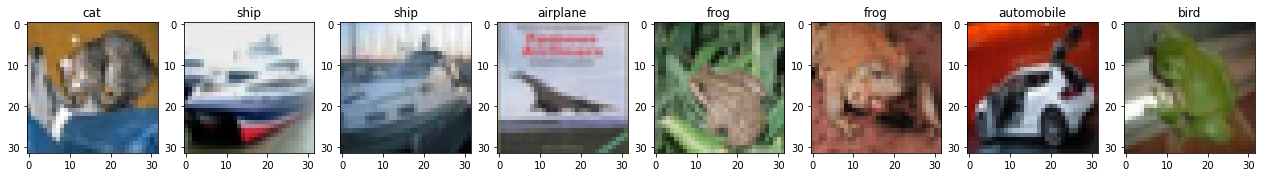

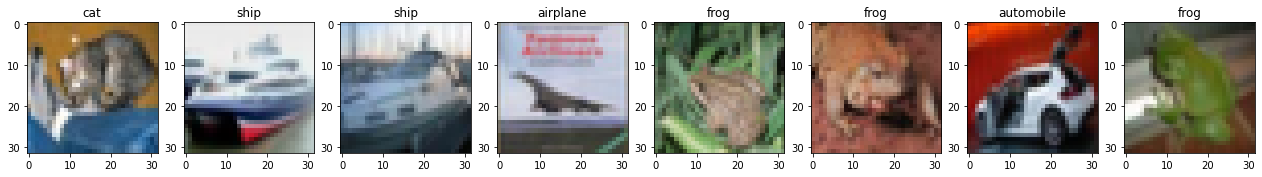

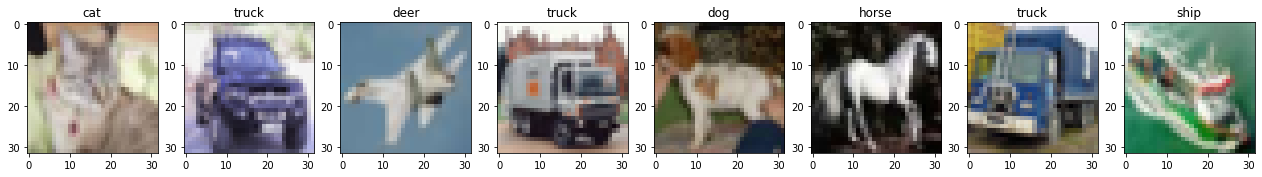

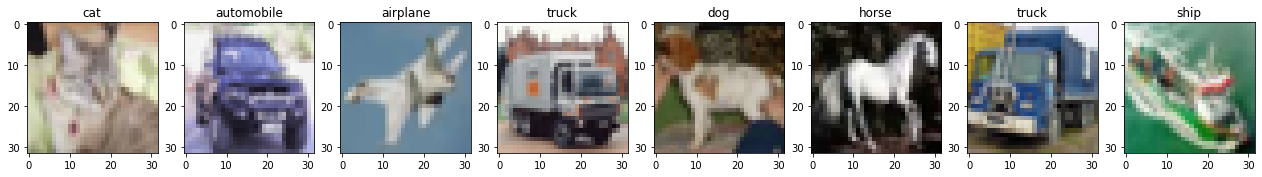

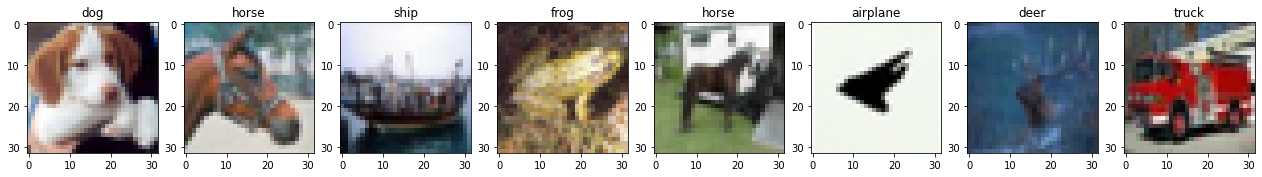

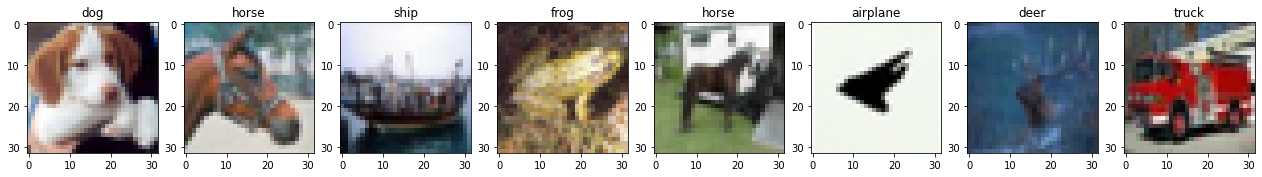

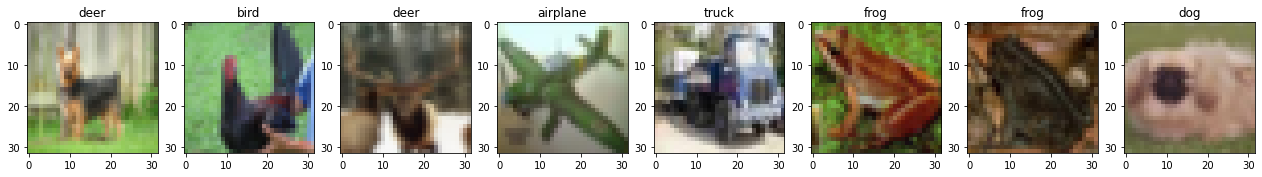

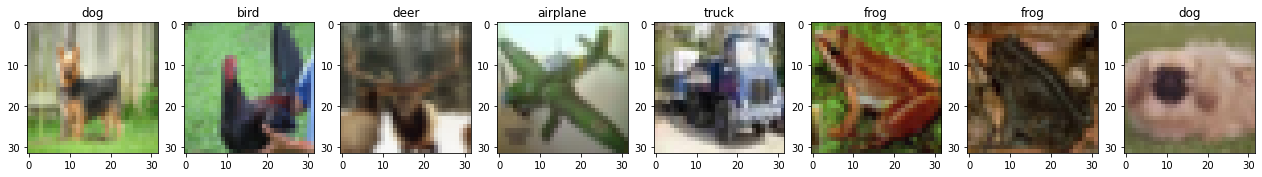

In [32]:
for i in range(0, 32, 8):
    show_images(test_images[i:i+8], predicted_class[i:i+8], ncols=8)
    show_images(test_images[i:i+8], test_labels[i:i+8], ncols=8)